In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [77]:
df = pd.read_csv('heart.csv')

In [78]:
columns_names = {'trtbps': 'blood_pressure', 'fbs': 'blood_sugar', 'thalachh': 'max_hr'}

In [79]:
df = df.rename(columns=columns_names)

In [80]:
df.head()

,age,sex,cp,blood_pressure,chol,blood_sugar,restecg,max_hr,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
df['output'].sum(), len(df)

(165, 303)

Количество измерений в каждом классе примерно одинаковое

In [7]:
df.describe()

,age,sex,cp,blood_pressure,chol,blood_sugar,restecg,max_hr,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.groupby(['caa']).count()['output']

caa
0    175
1     65
2     38
3     20
4      5
Name: output, dtype: int64

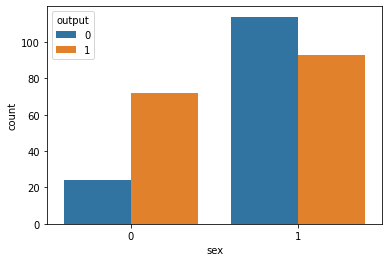

In [10]:
# sns.kdeplot(data=df, x='age', hue='sex')
sns.countplot(data=df, x='sex', hue='output')

На этой гистограмме видно, что принадлежность к полу 0(в датасете не описано, что это за пол) несет большие риски сердечного приступа

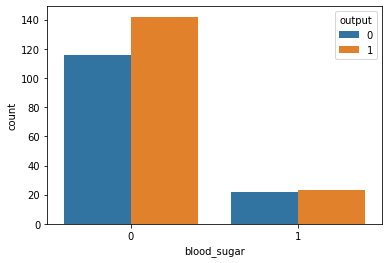

In [11]:
sns.countplot(data=df, x='blood_sugar', hue='output')

При этом количество сахара в крови не очень принципиально как отдельный признак

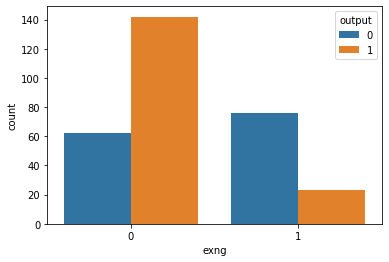

In [12]:
sns.countplot(data=df, x='exng', hue='output')

Также видно, что риск сердечного приступа выше у тех, у кого часто стенакордия вызвана не физическими нагрузками

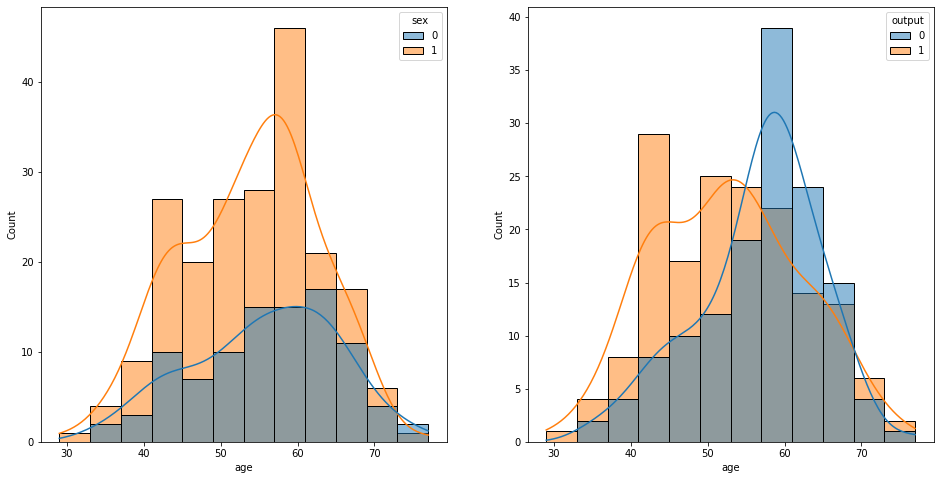

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))


sns.histplot(data=df, x='age', hue='sex', kde=True, ax=ax[0])
sns.histplot(data=df, x='age', hue='output', kde=True, ax=ax[1])

По этим распределениям можно видеть, возрастная группа преимущественно состоит из людей за 50(в общем то не удивительно). Также стоит отметить дизбаланст классов по полу. Людей пола 0 гораздо меньше, чем пола 1. В правом распределении видно различия в пиках, которое показывает, что довольно большая группа риска это медианная возрастная группа, хотя интуитивно казалось, если человек старее, то и риск больше, соответственно. 

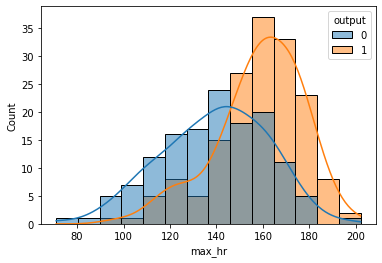

In [13]:
sns.histplot(data=df, x='max_hr', hue='output', kde=True)

Здесь видно, что чем выше максимальный пульс тем риск сердечного приступа выше, что опять же контринтуитивно. Интересно посмотреть, какое распределение у "старших" и у "младших"


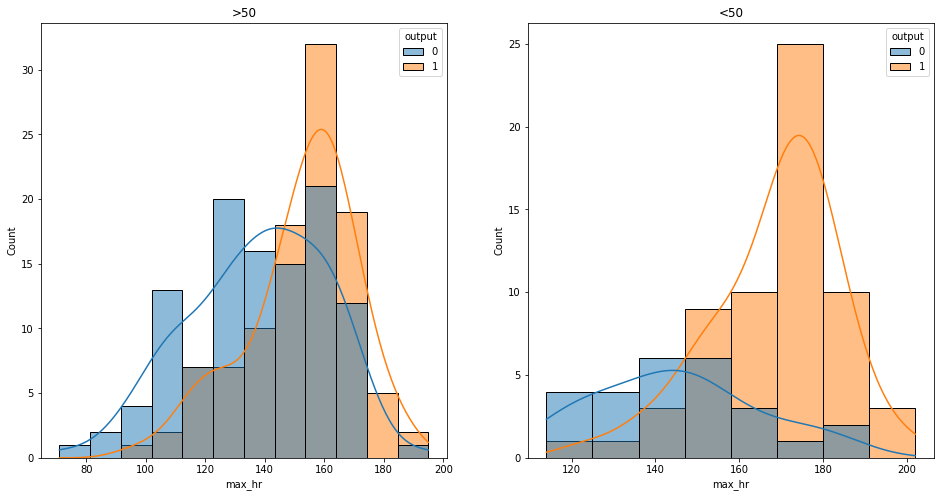

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.histplot(data=df[df['age'] >= 50], x='max_hr', hue='output', kde=True, ax=ax[0])
sns.histplot(data=df[df['age'] < 50], x='max_hr', hue='output', kde=True, ax=ax[1])
ax[0].set_title('>50')
ax[1].set_title('<50')
plt.show()

Интересно, что в двух возрастных категориях максимальный пульс должен быть не особо высоким, чтобы минимизировать риски сердечного приступа

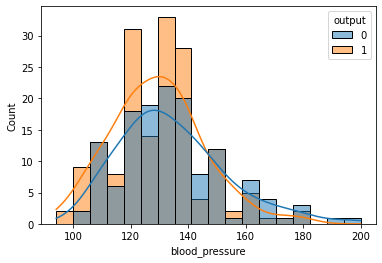

In [14]:
sns.histplot(data=df, x='blood_pressure', hue='output', kde=True)

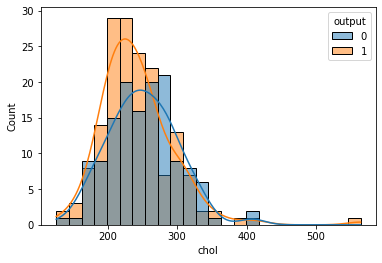

In [15]:
sns.histplot(data=df, x='chol', hue='output', kde=True)

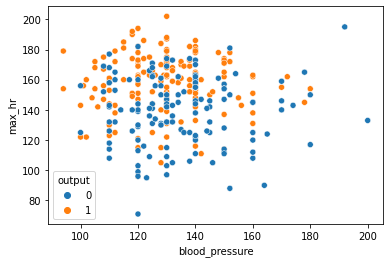

In [16]:
sns.scatterplot(x=df['blood_pressure'], y=df['max_hr'], hue=df['output'])

Посмотрим теперь на категориальные признаки

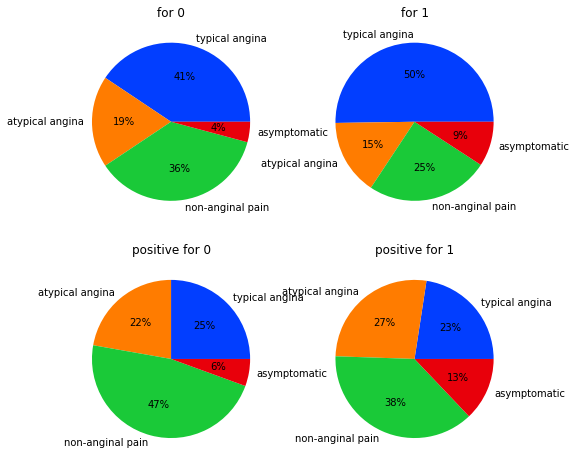

In [18]:
colors = sns.color_palette('bright')
filtered_1 = df[(df['sex'] == 0)].groupby(['cp']).count()['age']
filtered_2 = df[(df['sex'] == 1)].groupby(['cp']).count()['age']

filtered_3 = df[(df['sex'] == 0) & (df['output'] == 1)].groupby(['cp']).count()['age']
filtered_4 = df[(df['sex'] == 1) & (df['output'] == 1)].groupby(['cp']).count()['age']
labels = ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0][0].pie(filtered_1.values, labels=labels, colors=colors, autopct = '%0.0f%%')
ax[0][0].set_title('for 0')



ax[0][1].pie(filtered_2.values, labels=labels, colors=colors, autopct = '%0.0f%%')
ax[0][1].set_title('for 1')


ax[1][0].pie(filtered_3.values, labels=labels, colors=colors, autopct = '%0.0f%%')
ax[1][0].set_title('positive for 0')



ax[1][1].pie(filtered_4.values, labels=labels, colors=colors, autopct = '%0.0f%%')
ax[1][1].set_title('positive for 1')

plt.show()

На этих круговых диаграмах показаны доли типов болей в грудной клетке у разных полов. Можно видеть, что у тех людей, у которых высокий риск сердечного приступа преобладает неангинальная боль, в то время как типичная стенокардия уменьшает свое влияние.

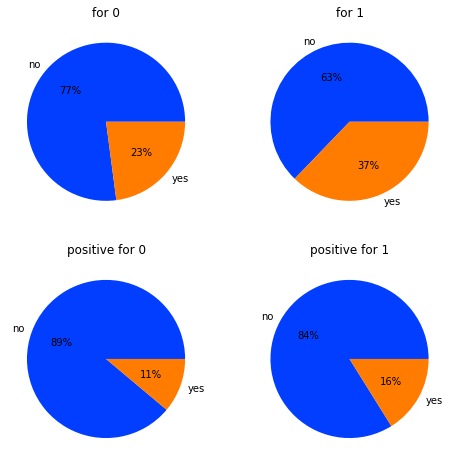

In [19]:
colors = sns.color_palette('bright')
filtered_1 = df[(df['sex'] == 0)].groupby(['exng']).count()['age']
filtered_2 = df[(df['sex'] == 1)].groupby(['exng']).count()['age']
filtered_3 = df[(df['sex'] == 0) & (df['output'] == 1)].groupby(['exng']).count()['age']
filtered_4 = df[(df['sex'] == 1) & (df['output'] == 1)].groupby(['exng']).count()['age']

labels = ['no', 'yes']
labels_for_last = labels[:-1]

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0][0].pie(filtered_1.values, labels=labels, colors=colors, autopct = '%0.0f%%')
ax[0][0].set_title('for 0')



ax[0][1].pie(filtered_2.values, labels=labels, colors=colors, autopct = '%0.0f%%')
ax[0][1].set_title('for 1')


ax[1][0].pie(filtered_3.values, labels=labels, colors=colors, autopct = '%0.0f%%')
ax[1][0].set_title('positive for 0')



ax[1][1].pie(filtered_4.values, labels=labels, colors=colors, autopct = '%0.0f%%')
ax[1][1].set_title('positive for 1')

plt.show()

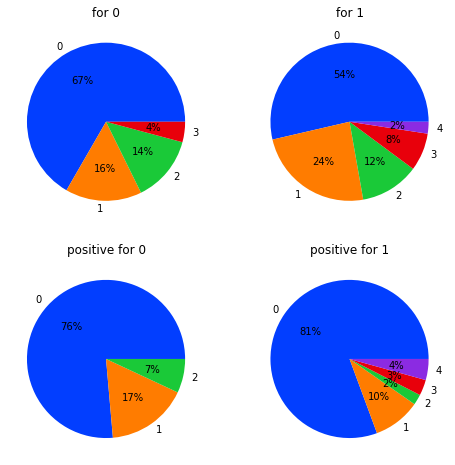

In [22]:
colors = sns.color_palette('bright')
filtered_1 = df[(df['sex'] == 0)].groupby(['caa']).count()['age']
filtered_2 = df[(df['sex'] == 1)].groupby(['caa']).count()['age']
filtered_3 = df[(df['sex'] == 0) & (df['output'] == 1)].groupby(['caa']).count()['age']
filtered_4 = df[(df['sex'] == 1) & (df['output'] == 1)].groupby(['caa']).count()['age']

labels = ['0', '1', '2', '3', '4']
labels_1 = ['0', '1', '2', '3']
labels_3 = ['0', '1', '2']

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0][0].pie(filtered_1.values, labels=labels_1, colors=colors, autopct = '%0.0f%%')
ax[0][0].set_title('for 0')



ax[0][1].pie(filtered_2.values, labels=labels, colors=colors, autopct = '%0.0f%%')
ax[0][1].set_title('for 1')


ax[1][0].pie(filtered_3.values, labels=labels_3, colors=colors, autopct = '%0.0f%%')
ax[1][0].set_title('positive for 0')



ax[1][1].pie(filtered_4.values, labels=labels, colors=colors, autopct = '%0.0f%%')
ax[1][1].set_title('positive for 1')

plt.show()

Посмотрим еще на непрерывные признаки

In [58]:
melt_df = pd.melt(df[['max_hr', 'blood_pressure', 'oldpeak', 'chol', 'sex']],
                  var_name='features', value_name='values', id_vars='sex')

In [59]:
df_cont = df[['max_hr', 'blood_pressure', 'oldpeak', 'chol', 'sex']].copy()

In [60]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
cont_norm_matrix = scaler.fit_transform(df_cont.drop(columns='sex'))
df_cont_norm = pd.DataFrame(cont_norm_matrix, columns=['max_hr', 'blood_pressure', 'oldpeak', 'chol'])
df_cont_norm = pd.concat([df_cont_norm, df_cont.loc[:, 'sex']], axis=1)

In [61]:
melt_df = pd.melt(df_cont_norm,
                  var_name='features', value_name='values', id_vars='sex')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


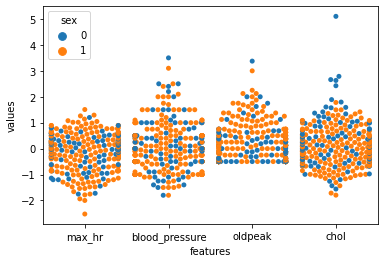

In [62]:
sns.swarmplot(data=melt_df, x='features', y='values', hue='sex')

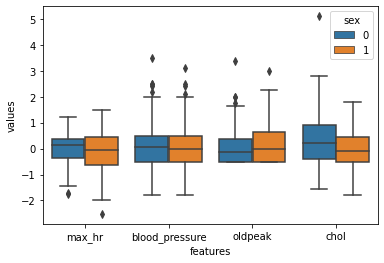

In [63]:
sns.boxplot(data=melt_df, x='features', y='values', hue='sex')

В принципе можно видеть, что зависимости от пола в явновыраженном виде нет. Можно сделать вывод из всего вышеперечисленного, что датасет просто несбалансированный по полу.

In [64]:
df_cont = df[['max_hr', 'blood_pressure', 'oldpeak', 'chol', 'output']].copy()

In [65]:
scaler = RobustScaler()
cont_norm_matrix = scaler.fit_transform(df_cont.drop(columns='output'))
df_cont_norm = pd.DataFrame(cont_norm_matrix, columns=['max_hr', 'blood_pressure', 'oldpeak', 'chol'])
df_cont_norm = pd.concat([df_cont_norm, df_cont.loc[:, 'output']], axis=1)

In [66]:
melt_df = pd.melt(df_cont_norm,
                  var_name='features', value_name='values', id_vars='output')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


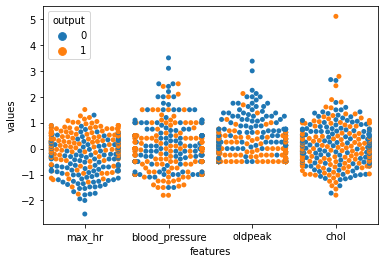

In [67]:
sns.swarmplot(data=melt_df, x='features', y='values', hue='output')

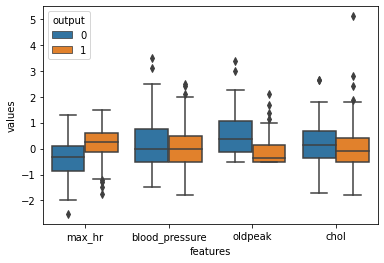

In [69]:
sns.boxplot(data=melt_df, x='features', y='values', hue='output')

При этом можно видеть, что хорошо разделяют такие признаки как максимальный пульс и oldpeak. 

Посмотрим попарно на непрерывные признаки

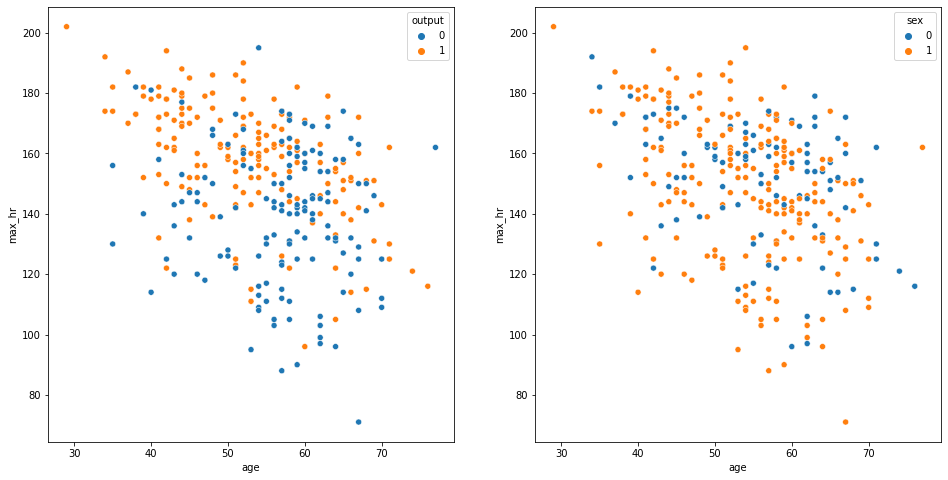

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(x=df['age'], y=df['max_hr'], hue=df['output'], ax=ax[0])
sns.scatterplot(x=df['age'], y=df['max_hr'], hue=df['sex'], ax=ax[1])

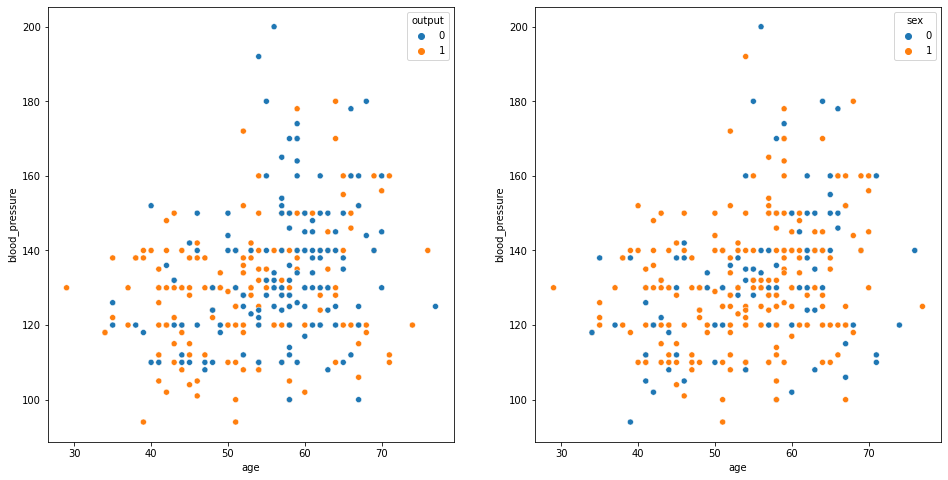

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(x=df['age'], y=df['blood_pressure'], hue=df['output'], ax=ax[0])
sns.scatterplot(x=df['age'], y=df['blood_pressure'], hue=df['sex'], ax=ax[1])

Возраст довольно сильно перемешан с другими непрерывными признаками



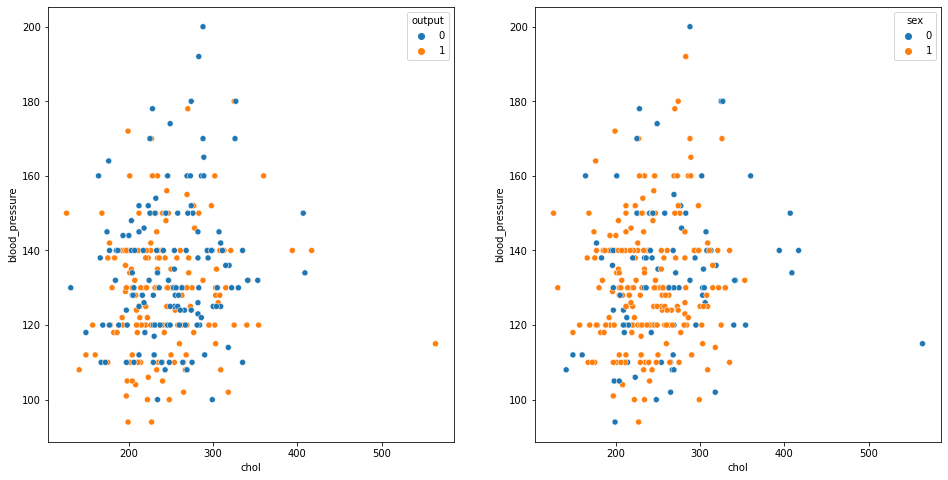

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(x=df['chol'], y=df['blood_pressure'], hue=df['output'], ax=ax[0])
sns.scatterplot(x=df['chol'], y=df['blood_pressure'], hue=df['sex'], ax=ax[1])

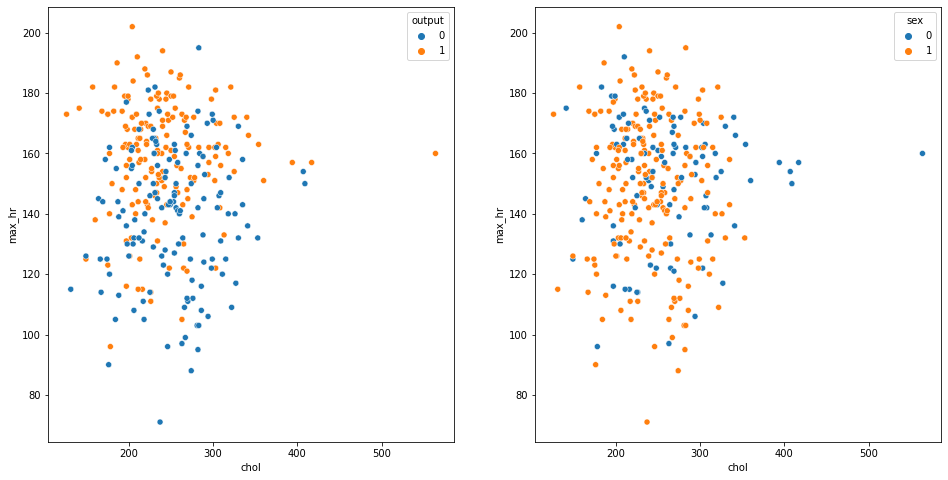

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(x=df['chol'], y=df['max_hr'], hue=df['output'], ax=ax[0])
sns.scatterplot(x=df['chol'], y=df['max_hr'], hue=df['sex'], ax=ax[1])

В принципе количество холестерина и максимальный пульс можно разделить прямой

Попробуем теперь обучить модельки по выбранным признакам

In [272]:
cat_features = ['sex', 'slp', 'restecg','caa', 'exng', 'cp', 'thall']
cont_features = ['age', 'blood_pressure', 'chol', 'max_hr', 'oldpeak']
target = 'output'

In [273]:
from sklearn.utils import shuffle
df = shuffle(df)

In [274]:
filtered_df = df[cont_features + cat_features + [target]]

In [275]:
oh_df = pd.get_dummies(filtered_df, columns=cat_features, drop_first = True)

In [276]:
oh_df[cont_features] = scaler.fit_transform(oh_df[cont_features])

In [277]:
X_data = oh_df.drop(columns='output').values
y_data = df['output']

In [278]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, recall_score


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=42)

In [279]:
# !pip install catboost

In [280]:
from catboost import CatBoostClassifier

In [281]:
catboost_model = CatBoostClassifier(iterations=1000,
                           depth=5,
                           learning_rate=1e-4,
                           eval_metric='AUC',
                           loss_function='Logloss',
                           verbose=False)

In [282]:
catboost_model.fit(X_train, y_train)

In [283]:
preds = catboost_model.predict(X_test)

In [284]:
accuracy_score(y_test, preds)

0.8360655737704918

In [285]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
grid = {'C': np.linspace(0.0001, 10, 10), 'kernel': ['rbf', 'linear'],
        'gamma': np.linspace(1e-5, 10, 10)}

svm = SVC(random_state=42)
search = GridSearchCV(svm, grid, cv=3, scoring='accuracy', refit=True, n_jobs=2)

In [286]:
search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=2,
             param_grid={'C': array([1.0000e-04, 1.1112e+00, 2.2223e+00, 3.3334e+00, 4.4445e+00,
       5.5556e+00, 6.6667e+00, 7.7778e+00, 8.8889e+00, 1.0000e+01]),
                         'gamma': array([1.00000e-05, 1.11112e+00, 2.22223e+00, 3.33334e+00, 4.44445e+00,
       5.55556e+00, 6.66667e+00, 7.77778e+00, 8.88889e+00, 1.00000e+01]),
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [287]:
search.best_params_

{'C': 4.4445, 'gamma': 1e-05, 'kernel': 'linear'}

In [288]:
svm = SVC(C=5.5, kernel='linear', gamma=1e-05, random_state=42)

In [289]:
svm.fit(X_train, y_train)

SVC(C=5.5, gamma=1e-05, kernel='linear', random_state=42)

In [290]:
preds = svm.predict(X_test)

In [291]:
accuracy_score(y_test, preds)

0.9344262295081968